# Classical statistical inference: Regression and model fitting

## Table of Content

- III. [Maximum Likelihood Estimation:](#III-Maximum-Likelihood-Estimation-(MLE)): A brief overview
    - III.1 [Likelihood](#III.1-Likelihood)
    - III.2 [Maximizing the likelihood](#III.2-Maximum-likelihood)
- IV. [Regression and Model fitting](#IV-Regression-and-model-fitting)
    - IV.1 [Regression for linear models](#IV.1-Regression-for-linear-models:)
        * [IV.1.1 Fitting a straight line](#IV.1.1-Fitting-a-straight-line)
        * [IV.1.2 General least square fit](#IV.1.2-General-least-square-fit)
        * [IV.1.3 Basis function regression](#IV.1.3-Basis-function-regression): *Topic not covered.*
        * [IV.1.4 Multi Linear regression](#IV.1.4-Multi-Linear-regression): *Topic not covered.*

    - IV.2 [Regularization and penalization of the likelihood](#IV.2-Regularization-and-penalization-of-the-likelihood): *Topic not covered.*
    - IV.3 [Regression for non linear models](#IV.3-Regression-for-non-linear-models:)
- XX. [References and supplementary material](#X)

In [1]:
import scipy.stats
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## III Maximum Likelihood Estimation (MLE)

We've seen that in frequentist inference, deriving information about a parameter $\theta$ consists in finding a point estimate $\hat{\theta}$ of this parameter and possibly drawing confidence intervals for $\theta$. To ensure that an estimator is the *best* possible estimator, frequentists generally follow a method called Maximum Likelihood analysis. We'll summarize the main ideas behind this approach hereafter. The interested reader may consult the notebook [MLE.ipynb](MLE.ipynb) (and ref. therein) for a more in-depth understanding. 

The first thing to do in that approach is to choose a model $M(\theta)$ that is supposed to describe the underlying population from which the data are drawn. This allows one to calculate a likelihood and find which values of the parameters maximize it, as explained below. 

### III.1 Likelihood


The Likelihood $L$ of a model and of its parameters is defined as $L~=~p(D \,|\,M(\boldsymbol{\theta}))$. Hence, this is the probability of Data given a model (in fact, given a model and its associated set of parameters). 
When we talk about the likelihoods of different models we are in general talking about the likelihoods of different sets of parameter values. 

It is important to note that a likelihood is not strictly speaking a probability as the sum of all the possible outcomes of a model must sum up to one, while the sum of the likelihood of the models (parameters) needed to explain the data do not have to add up to 1. 

Let's calculate the likelihood for specific case. Let's imagine that we have an ensemble of $N$ *independent* random variable {$x_i$} drawn from a normal (i.e. gaussian) distribution $N(\mu, \sigma)$, i.e. gaussian of mean $\mu$ and width $\sigma$ (i.e. errors on all the measurements $x_i$ are the same, namely the errors are "homoscedastic"). 

We know that the probability of a given measurement $x_k$ is:
$$
p(x_k \, | \, \mu, \sigma ) = \frac{1}{\sigma \sqrt{2\,\pi}} \, \exp\left[-0.5 \left (\frac{x_k - \mu}{\sigma} \right)^2\right] 
$$

If each measurement is independent of the other, the probability of having a given set of measurements will be proportional to the product of the individual probabilities. The likelihood can then be calculated as:
$$
L \equiv p(\{x_i\} | \mu, \sigma ) = \prod_{i=1}^{N} \frac{1}{\sigma \sqrt{2\,\pi}} \, \exp\left[-0.5 \left (\frac{x_i - \mu}{\sigma} \right)^2\right] = \frac{1}{\sigma^n (2\,\pi)^{n/2}} \prod_{i=1}^{N} \exp \left (\frac{-(x_i - \mu)^2}{2\, \sigma^2} \right)
$$

Note that this can be re-written:

$$
L \equiv p(\{x_i\} | \mu, \sigma ) = \frac{1}{\sigma^n (2\,\pi)^{n/2}} \exp \left ( \sum_{i=1}^N \frac{-(x_i - \mu)^2}{2\, \sigma^2} \right)
$$

If the errors are different for each random variable, then the likelihood becomes (see [MLE.ipynb](MLE.ipynb)):

$$
L =  \frac{1}{(2\,\pi)^{n/2}} \prod_{i=1}^{N} \frac{1}{\sigma_i} \exp \left (\frac{(x_i - \mu)^2}{2\, \sigma_i^2} \right)
$$

Because the likelihood becomes quickly small, one generally considers its logarithm. Taking the $\log$, we therefore have :

$$
\ln(L) =  -\frac{N}{2}\,\ln(2\pi) - \sum_i \ln(\sigma_i)  - \sum_{i=1}^N \frac{(x_i \,- \, \mu)^2}{2\,\sigma_i^2}, 
$$

### III.2 Maximum likelihood 

The maximum likelihood approach consists in reading the likelihood in a different way than usual.    

Let's first realise that, at first sight, you may consider the likelihood as being a function of your data. Indeed, if you make a measurement of a random variable and obtain a value $x$, the associated likelihood $L$ can be considered as a function of the data because the value of the likelihood you calculate depends on the data you have obtained. One may however turn this around. You have a set of data in hands, and may wonder: what should be the values of the parameters entering into the likelihood (i.e. in the gaussian case above, $\mu$ and $\sigma$) such that the likelihood is maximum (it is natural to think that your data have nothing peculiar). This means that you effectively reads the likelihood as a function of the model parameters. 

To summarize, the idea behind the **maximum likelihood estimation (MLE)** is two fold:   
- i) the probability of any given set of parameters $\boldsymbol{\theta}$ is proportional to the probability of observing the data (i.e. the likelihood defined above);
- ii) the most probable set of values of the parameters (of our model) should also be the one that maximizes the probability of obtaining the data. 

You know how to find the extrema of a function: by searching for which values of their variables (here the parameters of the model), its derivative is equal to 0. Because the likelihood can quickly become very small, one calculates its logarithm and search the maximum of $\ln{L}$.  The maximum of $\ln{L}$ (varying the "parameters" $\theta$) is obtained by searching the parameters $\theta$ that yield:

$$
\left. \frac{{\rm d}\ln(L(\theta_i))}{\rm{d}\theta_i}\right\vert_{\hat {\theta_i}} \equiv 0
$$

One can show, e.g. for the gaussian case, that the estimator of the mean $\hat{\mu} = \sum{x_i}/n$ is effectively a maximum likelihood estimator of the mean. The interested reader will find the proof in [Sect. III.2 of MLE.ipynb](MLE.ipynb#III.2--Maximum-Likelihood-Estimation-(MLE)). 

## IV Regression and model fitting

Having in hands a set of mutidimensional data, let's say an independent variable $x$, and dependent variable $y$. Then the problem of regression consists in finding the expectation value (another word to say the arithmetic *mean*) of $y$ given x, i.e. $E(y|x)$ (i.e. this is a conditional expectation value). This is bread and butter of scientific research. If we have a model for the conditional distribution, we can write $y \, = \, f(x\,|\,{\boldsymbol{\theta}})$ where ${{\boldsymbol{\theta}}}$ are the parameters of the model. Regression will then consist in finding the parameters $\boldsymbol{\theta}$ that yields $E(f(x\,|\,\boldsymbol{\theta}))$. Note here that $x$, the independent variable, does not have to be a random variable, it could be a deterministic variable, such as a deterministic sampling of a time series. 


The way you will deal with regression depends of the chacteristics of your problem:
- *Linearity*: Is the model linear *in its parameters*, i.e. $f(x\,|\,{\boldsymbol{\theta}}) = \sum_{p=1}^{k} \, \theta_p g_p(x)$, where $g_p(x)$ can be a non linear function of $x$ BUT does not depend on any of the free parameters. 
- *Complexity*: A large number of independent variables increases the complexity of the error covariance matrix and of the problem solving. For linear models with small/negligible errors on the independent variable, problem complexity is not a severe issue. 
- *Error behaviour*: The uncertainties on the dependent and independent variables, and their correlation, generally govern the choice of the regression method. Several situation can occur:
    1. Dependent and independent variable have negligible errors
    2. Dependent variable $y$ has significant homoscedastic Gaussian error, $x$ has negligible errors. 
    3. Dependent variable $y$ has significant heteroscedastic Gaussian error, $x$ has negligible errors. 
    4. Dependent variable $y$ has non Gaussian errors, but their behaviour is known. 
    5. Dependent variable $y$ has non Gaussian errors, but their behaviour is unknown
    6. Errors on the independent variable $x$ are unknown, but the full covariance matrix can be treated as Gaussian. 
    7. All variables have non gaussian errors. 
    
        - Case 1, 2, 3, 4 ->  easily solvable with frequentist or Bayesian techniques.
        - Case 5 -> 7 are more easily solvable with Bayesian techniques. 

### IV.1 Regression for linear models:

The problem is the following: we have n data points $y_i$ with associated errors $\sigma_i$, and a model $f(x_i \, | \, \boldsymbol{\theta})$ that makes prediction for the values of our data points, i.e. $ f(x_i \, | \, \boldsymbol{\theta}) = y_{i, \rm{mod}}$. Then, the standard frequentist approach consists in defining a *merit function*:
$$
\chi^2 \equiv \sum_{i=1}^{n} \frac{(y_i - y_{i, mod})^2}{\sigma_i^2}
$$

and finding the parameters $\boldsymbol{\theta}$ that minimize that function. Minimizing this function means that we modify the parameter to minimize the square of the vertical (weighted) distance between the data point and the model (numerator of the above expression). This minimization however accounts for the uncertainty on each data point through a weighting factor inversely proportional to the uncertainty on that point (i.e. $1/\sigma^2_i$). This ensures that the points with the largest uncertainty contribute less to the process than those that are known more precisely. When there is no weight, one speaks of *least square* regression. When the uncertainty on the individual data points is considered (as above), one speaks of *chi square* ($\chi^2$) regression.

![least square](../Figures/fig_least_square.png)

Minimizing the $\chi^2$ is equivalent to find the line that go through all the blue points and which is such that the red vertical line is the shortest for each of the point. 

If the errors between data points are correlated, we need to introduce a covariance matrix, $[C]$ and its inverse, ($[F] \equiv [C]^{-1}$ , or Fisher matrix) is defined as :

$$
C_{i,l} \equiv cov(y_i, y_l). 
$$

I.e., for two data points $y_k, y_l$ we have: 

$$
[F]^{-1} \, = \, [C] \, = \, \left[ \begin{array}{ccc}
\sigma^2_k & \sigma_{kl} \\
\sigma_{kl} & \sigma^2_l \\
 \end{array} \right]   
$$

Since $[C]$ and $[F]$ are symmetric, the $\chi^2$ can be written:

$$
\chi^2 = \sum_{i=1}^{n} \sum_{l=1}^{n}  (y_i - y_{i, mod}) F_{i,l} \, (y_l - y_{l, mod}). 
$$

You can easily verify that this expressions resumes to the original definition when errors are uncorrelated. 

If one considers the vector **data** $\overrightarrow d$ constituted of the $y_i$, and the vector **model**  $\overrightarrow m$ constitued of the $y_{i, mod}$, we can then also write the following equivalent expression for the $\chi^2$:   

$$
\chi^2 = (\overrightarrow d - \overrightarrow m)^T \, C^{-1} \, (\overrightarrow d - \overrightarrow m)  
$$

There is another coefficient which is sometimes reported to discuss the quality of the prediction of the regression, this is the **linear determination coefficient of Pearson**, often written $R^2$. It is calculated based on: 

- The sum of squares of the residuals (or residual sum of squares): $SS_{\rm res} = \sum_i^n (y_i - y_{i, \rm{mod}})^2$
- The regression sum of squares: $SS_{\rm {rsq}} = \sum_i^n (y_{i, \rm{mod}} - \bar{y} )^2$
- The total sum of squares: $SS_{\rm tot} = \sum_{i}^{n} (y_i - \bar{y})^2  $, where $\bar{y}$ is the mean of the $y_i$ data. 

The coefficient of determination is defined as:

$$
R^2 = \frac{SS_{\rm rsq} }{SS_{\rm tot}}
$$

This expression can be shown to be equivalent (for a straight line model; see [this link for a demo](https://online.stat.psu.edu/stat462/node/95/)) to: 

$$
R^2 = 1 - \frac{SS_{\rm res}}{SS_{\rm tot}}
$$

The latter expression is the most commonly used to calculate $R^2$. 
If the model values perfectly match the observed values, we have $R^2 = 1$. The model "explains" the variance in the data points (or equivalently, how much $R^2$ percents of the variations in $y$ is reduced by the variation in the "model" f(x)). A $R^2 = 1$ means that the model has a good predictive power (for a straight line model). If $R^2 \sim 0$, it means that the model does not explain the distribution of values $y$. I **discourage** its use to make a statement about the quality of a regression. It rather tells you about the usefulness of "adding" a model to explain the variations seen in the data points.

**Note**: The Pearson determination coefficient is different (but related) from the Pearson *correlation* coefficient which is also commonly noted $r$ or $r_{xy}$. The correlation coefficients directly relates *pairs of data points* (i.e. it involves $y_i$ **and** $x_i$). For a data sample ($x_i$, $y_i$), the Pearson product-moment formula is written:  

$$
r_{xy} = \frac{\sum_i (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum_i (x_i - \overline{x})^2 \sum_i (y_i - \overline{y})^2}} = \frac{\sum_i x_i y_i - N \overline{x} \overline{y}}{(N-1) \sqrt{{\rm Var}(x) {\rm Var}(y)}}
$$

The Pearson correlation coefficient $r_{xy}$ enables to make a statement about the existence of a correlation between 2 quantities.

Now that we have drawn the general picture, let's study in more details some of the specific classes of problems outlined above. 

#### IV.1.1 Fitting a straight line

*Minimizing the value* of the $\chi^2$(through a change of the parameters $\theta$ of the model) is effectively equivalent to a *maximization of the likelihood*. Let's see it in the context of the fit of a straight line. 

Let's consider the data ${x_i}$, ${y_i}$, where $x$ is the independent (or exogenous) variable , and $y$ is the dependant variable (or endogenous; in other words the variable you want to predict). Those data are a realisation of (the *generative model*) $y = \theta_0 + \theta_1 \, x$. 
If we write the noise realisation of the data point $i$, $\epsilon_i$ (assuming a normal distribution of the noise, i.e. $\epsilon_i \sim  N(0, \sigma_i)$), then we can write:

$$
y_i = \theta_0 + \theta_1 \, x_i + \epsilon_i 
$$

$\theta_0$ and $\theta_1$ are the parameters that we want to estimate. 

Note that we should take the habit to speak of uncertainties rather of errors as the uncertainty on the data points simply results from a random process, hence there is no single value you can access to by making your measurement, while error suggests that you are doing a mistake in making your measurements.

As we have seen [in Sect. III.1](#III.1-Likelihood), if the errors $\epsilon_i$ on $y_i$ are drawn from a Gaussian, the likelihood can be written: 

$$
L \, \equiv \, p(\{y_i\} \, | \, \{x_i\}, {\boldsymbol{\theta}} ) =  \prod_{i=1}^{N} \frac{1}{\sigma_i \sqrt{2\,\pi}} \, \exp\left[\left (\frac{ -(y_i - (\theta_0+\theta_1\,x_i))^2}{2\,\sigma_i^2} \right)\right]
$$

Or, written in terms of log-likelihood:

$$
\ln(L) \, \propto \sum_{i=1}^{N} \left (\frac{ -(y_i - (\theta_0+\theta_1\,x_i))^2}{2\,\sigma_i^2} \right) 
$$

Hence, maximizing the log-likelihood as a function of the model parameters $\boldsymbol{\theta}$ in this case, is equivalent to minimizing the (weighted) sum of the square errors $\epsilon_i$. 

We also see that the likelihood can be written as $L \propto \exp(-\chi^2/2)$ (**THIS IS IMPORTANT TO KEEP IN MIND**).   

**Note**: We will see that Bayesians reach the same conclusion when assuming a flat/uninformative prior on $\boldsymbol{\theta}$.  

In case of Gaussian homoscedastic uncertainties ($\sigma_i$ are the same for each $i$ -but $\epsilon_i$ are different), you can explicitly derive the values of $\theta_0, \theta_1$ and the standard error on the parameters $\sigma^2_{\theta_1} , \sigma^2_{\theta_2}$. 
For this purpose, you need to solve two equations with two unknowns:
$$
\frac{\partial \ln(L)}{\partial \theta_0} = 0 
$$
$$
\frac{\partial \ln(L)}{\partial \theta_1} = 0
$$

while the errors on the *parameters* can be derived from the error propagation formula. 

You end up finding that: 
$$
\theta_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x} \bar{y}} {\sum_{i=1}^N (x_i - \bar{x})^2 } 
$$
$$
\theta_0 = \bar{y} - \theta_1{\bar{x}}
$$

#### Heteroscedastic error and matrix formalism

For heteroscedastic errors ($\sigma_i$ are the *different* for each $i$), and even more general regression function, one rather uses a more compact matrix notation.

Our problem consists in finding a solution for: 
$$
y_0 = \theta_0 + \theta_1 \, x_0 + \epsilon_0 \\
y_1 = \theta_0 + \theta_1 \, x_1 + \epsilon_1 \\
... \\
y_{N-1} = \theta_0 + \theta_1 \, x_{N-1} + \epsilon_{N-1}
$$

We can therefore define $M$ (called design matrix) such that $Y = M\,\boldsymbol{\theta} + E$, where $Y$ is a $N$ dimensional vector containing our $y_i$ (i.e. our $N$ points $y_i$). 

For our straight line regression, $\boldsymbol{\theta}$ is a vector containing our 2 parameters:

$$
\boldsymbol{\theta} =  \left[ \begin{array}{c}
\theta_0 \\ \theta_1  
 \end{array} \right] ,
$$

$M$ is a $2 \times N$ matrix:

$$
M =  \left[ \begin{array}{cc}
1 & x_0 \\ 1 & x_1  \\ ... \\ 1 & x_{N-1} 
 \end{array} \right], 
$$

where the constant values in the first columns correspond to the constant value $\theta_0$ in our regression. 

The $\chi^2$, i.e. the weighted sum of the square errors 

$$
\chi^2 \equiv \sum_i \frac{(y_i - (\theta_0+\theta_1\,x_i))^2}{\sigma_i^2}, 
$$

gets written with matrix representation: 

$$
S = (Y - \boldsymbol{\theta} M)^T C^{-1} (Y-\boldsymbol{\theta} M).
$$ 

where $C$ is a $N\times N$ covariance matrix representing the errors in the data points. 

More details on the matrix fomalism are given in [Regression_short_sup.ipynb](Regression_short_sup.ipynb). 

=> **For linear regression, finding the best parameters of the model is done through simple algebra**

#### Python implementation:

If you simply want to make a linear regression for a data set $y(x)$, you can use in `scipy.stats` the method `linregress` (i.e. `from scipy.stats import linregress`) but this routine is a simple least-square (the errors are assumed to be identical for all the data points).    
The alternative is to use `numpy.polyfit(x, y, deg=1, w=1/sigma)`, where $x,y$ are your data, $w$ is the weight associated to the data and `deg=1` is there to fit a model of degree =1. The results of polyfit can then be fed into the method `np.poly1d()` which enables to evaluate a polynomial for any value of `x`. Since numpy 1.4, a new `Polynomial` class has been introduced. It provides higher numerical precision than `np.poly1d()` and numpy developpers recommend to use it. Convenience methods exists to manipulate/operates with those higher precision polynomials. The following page explains how to transition to the higher precision polynomials https://numpy.org/doc/stable/reference/routines.polynomials.html . Beware: There is a key difference of syntax between `np.poly1d()` and `np.polynomial.Polynomial()`: the ordering of the coefficients for the polynomial expressions is different. `np.polynomial` deals with series whose coefficients go from degree zero upward, which is the reverse order of the `np.poly1d()` convention.  
This means: 
``` python
p1d = np.poly1d([0.5, 2, 3])   # 0.5 * x^2 + 2x + 3   
p = np.polynomial.Polynomial(p1d.coef[::-1])
```

#### Example: 

The file `SNdata.txt` contains distance modulus generated for a simulated sample of supernovae (derived following Sect. 8.1.1 of our [book](#book)). The distance modulus is given by:
$$
\mu(z) = -5 \, \log \left( (1+z) \frac{c}{H_0} \int \frac{{\rm d} z}{(\Omega_m (1+z)^3 + \Omega_\Lambda)^{1/2} }  \right)
$$

This model is clearly non linear, and the error bars are heteroscedastic Gaussian noise that increases with the supernova redshift. Clearly this won't be well represented with a linear model, but we will keep this example all along (in this lecture and in the upcoming ones) to see how various regression techniques help in fitting those data sets.

The file contains 3 columns: 1- The Supernova redshift ; 2- Its distance modulus $\mu(z)$ (calculated based on some cosmological parameters), and 3- The uncertainty $\sigma_\mu$ on the distance modulus.
We will now read that file and perform a linear regression on the data. We know that this will not work well, but this does not preclude trying this linear model to see how it performs. 


In [2]:
# Reading the data and filling data arrays
data = np.loadtxt('SNdata.txt')
x_data, y_data, sigma = data[:,0], data[:,1], data[:,2]
wght = 1./sigma

In [3]:
# MLE regression of a linear model (deg=1)
p_model = np.polyfit(x_data, y_data, deg=1, w=wght)  # We do not look at the covariance matrix for now
x_grid = np.linspace(x_data.min(), x_data.max()+0.1, 100)   # regularly sampled x
y_predict = p_model[1] + p_model[0] * x_grid
y_model = p_model[1] + p_model[0] * x_data   

print('Fitted coefficients: slope = %.3f, intercept= %.3f' %(p_model[0], p_model[1]))

Fitted coefficients: slope = 4.623, intercept= 39.687


Text(0, 0.5, '$\\mu(z)$')

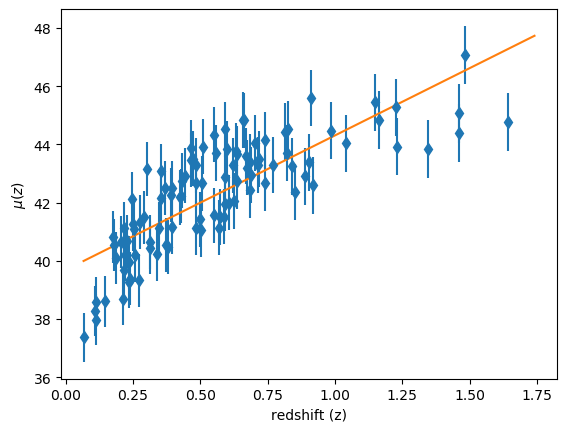

In [4]:
# Showing the results
plt.errorbar(x_data, y_data, yerr=sigma, ls='', marker='d')
plt.plot(x_grid, y_predict)         # Calculate y for the sorted x array 
plt.xlabel('redshift (z)')
plt.ylabel(r'$\mu(z)$')

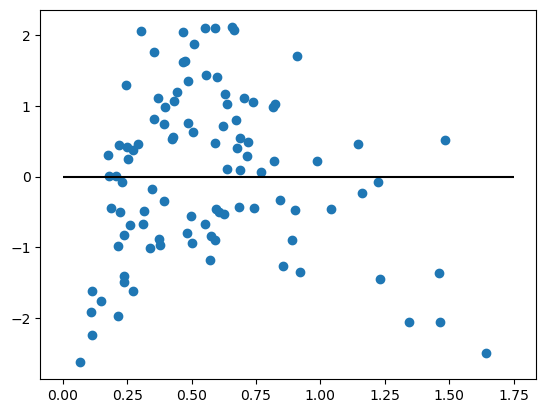

In [5]:
# Look at the residuals (data-model)
plt.scatter(x_data, y_data-y_model)
plt.hlines(0, 0, 1.75)

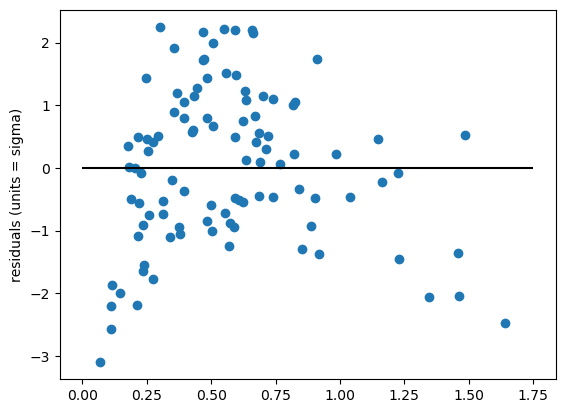

In [6]:
# Even better: if you trust your uncertainties, you may consider to use a normalised residual
# Normalised residuals: (data - model) / sigma
plt.scatter(x_data, (y_data-y_model) / sigma )
plt.ylabel('residuals (units = sigma)')
plt.hlines(0, 0, 1.75)

**Beware of the y axis**. You can also visualise the distribution of the residuals 

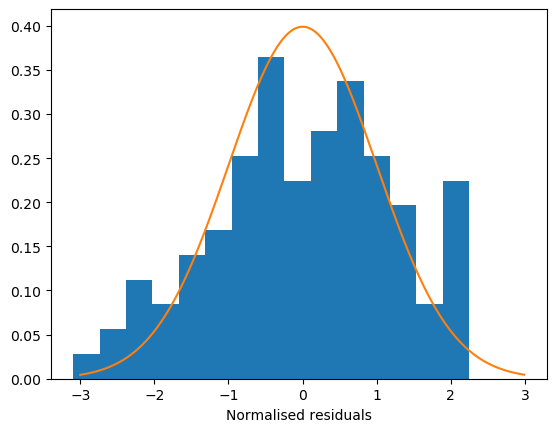

In [7]:
plt.hist((y_data-y_model) / sigma , bins=15, density=True);
plt.xlabel("Normalised residuals")
g = scipy.stats.norm(0, 1)
x_resi = np.arange(-3,3, 0.01)
plt.plot(x_resi, g.pdf(x_resi)); 

In [8]:
# Calculating the chi^2
chi2 = np.sum(( (y_data-y_model)/sigma)**2) 
print('chi^2 = %.2f , for %i dof, namely a reduced chi2= %.2f' %(chi2, len(x_data)-2, chi2/(len(x_data)-2)) )
# Calculating R2 
R2 = 1 - (np.sum( (y_data-y_model)**2) / np.sum((y_data - y_data.mean())**2))
R2_alt = np.sum( (y_model - y_data.mean())**2) / np.sum((y_data - y_data.mean())**2)
print('R^2 = %.3f ; R^2 (2nd formula) = %.3f' %(R2, R2_alt))

chi^2 = 153.57 , for 98 dof, namely a reduced chi2= 1.57
R^2 = 0.622 ; R^2 (2nd formula) = 0.671


#### Quality of the linear regression:

We know that if we repeat the observations a large number of times, the $\chi^2$ should get distributed following a $\chi^2$ distribution. If $Q = \sum_{i=1}^{N} z_i^2$ is the sum of the squared residuals, the $\chi^2$ distribution, with $k = N$ degrees of freedom can be written:      

$$
p(Q/k) = \frac{1} {(2\,\Gamma(k/2))}  (Q/2)^{k/2-1}  \exp(-Q/2)
$$

We know that the expectation value in that case is $k$ and the standard deviation $\sigma = \sqrt{2k}$. Hence, $E(\chi^2) = N-n_{\rm {param}}$. For the linear fit above, we have 98 dof and hence we expect our $\chi^2$ to be within some fraction of $\sigma = \sqrt{2*98} \sim 14 $ from 98. 


Because we know that the $\chi^2$ follows a chi-2 distribution, we can use the CDF of the chi2 distribution to make a statistical statement about the value of the $\chi^2$ that we have obtained, i.e. what is the probability of getting a value of $\chi^2$ larger or equal to the one we have obtained. If we write $x$ the value we obtain and $X$ the random variable for which we now the distribution, it means we search to find $p(X \leq x)$. Remember that from the CDF, we have  can $p(x \leq X)$, so this (one-tailed) p-value is simply 1-CDF. This p-value is not only used in the context of $\chi^2$ but in the general context of hypothesis testing. 

If the p-value is small (conventionally $< 0.05$ ; but you can be much more conservative), it means that it is unlikely to get such a large value of the $\chi^2$. On the contrary, if it is too close to 1, it is also suspicious. It means that the derived $\chi^2$ is very low and probably much lower than what you would have obtained for a random sample. In both cases, the interpretation strongly relies on the uncertainty $\sigma$ on your data point. If $\sigma$ is **over-estimated**, your $\chi^2$ will be too small (and p-value close to 1). Conversely, if the uncertainties are **under-estimated**, your $\chi^2$ will be too large (and p-value $< 0.05$). 

In [9]:
1-scipy.stats.chi2.cdf(chi2, df= len(x_data)-2) # Using the cdf (1-p(x < x_i))

0.0002864513207404551

Text(0.5, 1.0, 'CDF (chi2 distribution)')

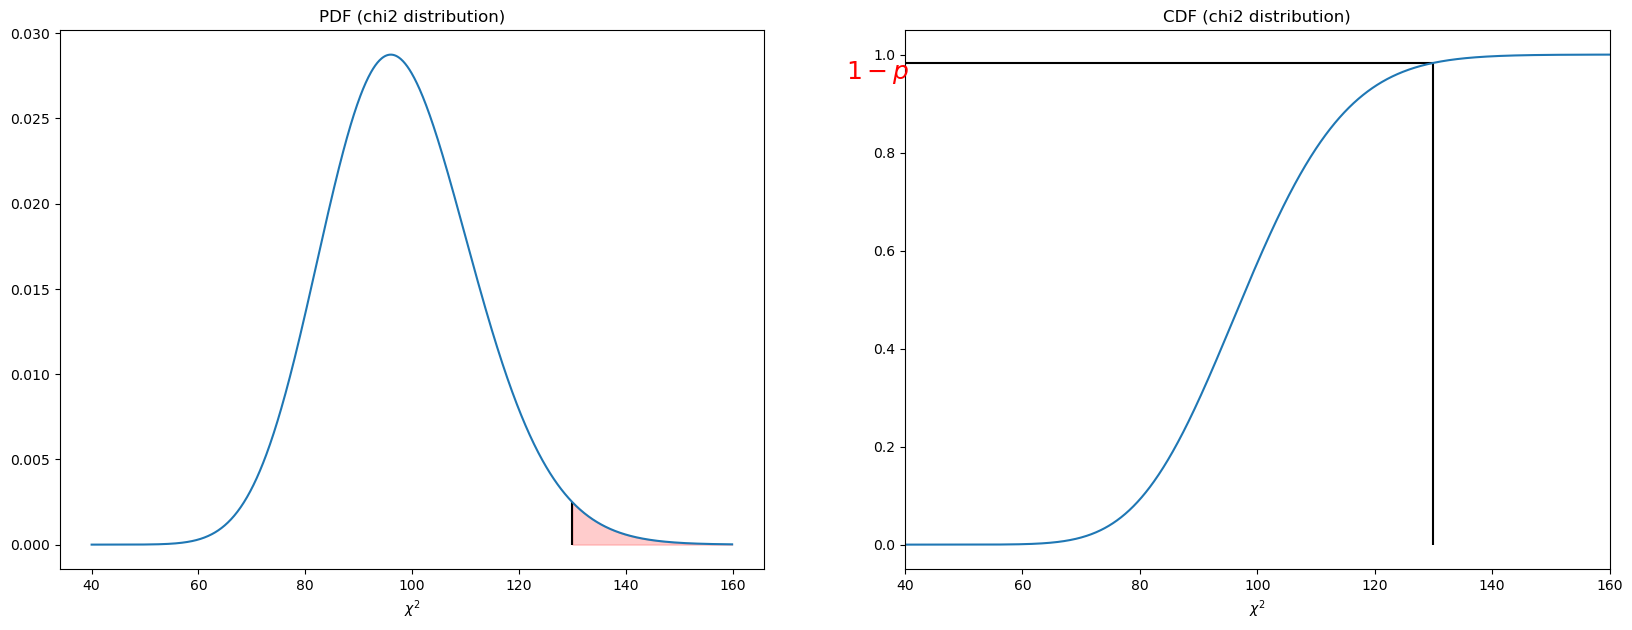

In [10]:
# Illustration of the p-value for a chi2 = 130
chi2 = 130.  # FOR THE SAKE of illustration 
X = np.arange(len(x_data)-60, len(x_data)+60, 0.1)
pdf_chi = scipy.stats.chi2.pdf(X, df= len(x_data)-2)
cdf_chi = scipy.stats.chi2.cdf(X, df= len(x_data)-2)
f, ax = plt.subplots(ncols=2, figsize=(20, 7))
ax[0].plot(X, pdf_chi)
ax[0].set_xlabel(r'$\chi^2$')
ax[1].plot(X, cdf_chi)
ax[1].set_xlabel(r'$\chi^2$')
idchi2 = np.searchsorted(X, chi2)   # Search the id of our chi2 in X
ax[0].vlines(chi2, 0, pdf_chi[idchi2]) 
ax[1].vlines(chi2, 0, cdf_chi[idchi2]) 
ax[0].fill_between(X[idchi2::], 0, pdf_chi[idchi2::], color='red', alpha=0.2)
pval = 1 - scipy.stats.chi2.cdf(chi2, df= len(x_data)-2)
ax[1].hlines(cdf_chi[idchi2], 40, chi2) 
ax[1].set_xlim(40, 160)
#ax[1].annotate(r'$1-p$', (40, 0.9), fontsize=18.)
ax[1].text(30, 0.95, r'$1-p$', fontsize=18., color='red')
ax[0].set_title('PDF (chi2 distribution)')
ax[1].set_title('CDF (chi2 distribution)')

For illustration, we have changed the $\chi^2$ value of the fit to 130. The p-value correspond to the probability to have a $\chi^2$ at least as large as 130, this is therefore the red area of the left figure. The CDF for $\chi^2 = 130$ corresponds to $1-p$.  

In [11]:
# p value of the fit for chi2= 130
pval = 1-scipy.stats.chi2.cdf(130, df= len(x_data)-2)
pval

0.016912939591529397

#### What about the uncertainties on the fitted parameters? 

As we have seen above, linear regression enables the calculation of the covariance matrix on the parameters of the model. This covariance matrix encodes, along the diagonal axes, the variance on the fitted parameters, and along the non diagonal ones, the covariance (how the parameters are correlated). 

<div class="alert alert-block alert-info">
The square root of the diagonal elements gives the *standard uncertainty* (equivalent to stde) for each coefficient BUT beware that the non diagonal give the covariance (used for *error propagation* for instance). These uncertainties are reliable if your uncertainties on your data points (y values) are normally distributed and correct (not over/under-estimated). 
</div>

<div class="alert alert-block alert-warning">
<b> Warning </b>: `np.polyfit()` returns the covariance matrix ONLY if you specify the argument `cov`. The argument `cov` can take three values: `True, False, 'unscaled'`. If `cov=False`, the covariance matrix is not returned. You need to <b>understand</b> the difference between `cov=True` and `cov=unscaled`. Let's discuss those two options: 

- `cov = True`: the covariance are scaled by $\chi^2 / {\rm{dof}}$ i.e., the weights are presumed  to be unreliable except in a relative sense and everything is scaled  such that the reduced $\chi^2$ is unity.
- `cov = 'unscaled'`: is relevant for the case that the weights are $1/\sigma^2$, with $\sigma$ known to be a reliable estimate of the uncertainty (on your data points).
</div>

What should I use: `cov = True` or `cov = 'unscaled'`? You might be tempted to use `cov = True` because this ensures that your uncertainties are not too wrong if your model is correct. Now this also means that the uncertainties on your parameters are almost never right. Indeed, you expect the reduced $\chi^2$ to deviate from 1 due to statistical noise (i.e. its value will depend on the data realisation). By rescaling the uncertainties, you will ignore this statistical fluctuation and "inflate" / "deflate" the uncertainties on the parameters. This is a problem if you know that the uncertainties on your data points are correct. If they are not correct (i.e. relative uncertainties are right but not absolute ones) then this rescaling is probably the best you can do. It would however be better to enable a "range" of plausible rescaling instead of choosing the one that ensures that  $\chi^2 / {\rm {dof}} = 1$. This is best managed with Bayesian inference. If you apply a model to simulated data for which you know the data uncertainties (because you decide for them), you should generally NOT use `cov = True`. 

Is this always a concern? A good news is that for linear model, there is no impact of the rescaling on the infered value of the parameters. Only the uncertainty on those calculations require some thoughts. There are situations where the difference between `cov = True` or `cov = 'unscaled'` will be small: if the number of data points is large, your $\chi^2$ will not vary much between data realisations. Indeed, the $\chi^2$ follows a $\chi^2(k)$ (k = dof) distribution, and the width of the distribution is $\sqrt{2 k}$. Large k ensures a small relative change of the $\chi^2$ due to sample randomness.  

#### Exercise IV.1 - Linear model: 

Let's assume the following fake data set:
``` python 
a, b = 0.3, 0
xdata = np.arange(0., 6., 0.05)
sigma = np.zeros_like(xdata)+0.1  # homoscedastic errors
ydata = b + a * xdata + sigma * np.random.randn(len(xdata))
```
- Fit a straight line to those data
- Estimate the quality of the fit. Is it reasonable ? 
- Re-do the fit using wrong error bars (you can simply give an over/underestimated $\sigma$ when calculating the goodness of of fit). Try e.g. overestimate of the error bars by a factor 0.75, 0.9, 1.2, 1.5. Is the new $\chi^2$ plausible ? What can you say regarding the P-value associated to the $\chi^2$ found ?  

In [15]:
# Creating a fake data set 
a, b = 0.3, 0
x_data = np.arange(0., 6., 0.05)
sigma = np.zeros_like(x_data) + 0.1  # homoscedastic errors
epsilon_noise = np.random.randn(len(x_data))   # noise drawn from N(0,1)
y_data = b + a * x_data + sigma * epsilon_noise

In [17]:
# Plot the results 
f, ax = plt.subplots(ncols=1, figsize=(10,5))
 # <- Add a command to display the data / make the plot 
ax.set_xlabel('x')
ax.set_ylabel('y')

In [16]:
# Perform the regression
ddof = 
p_model, cov = np.polyfit() 
chi2 = 
print('Model parameters '  )  # <- Print the value of the best fit model 
print('Value of the xhi2 = %.2f (ddof = %.2f) '%())
print('Reduced chi2 =%.2f' %())

In [ ]:
# Plot the results - 2 rows figure with the data on the upper row and residuals on bottom
f, ax = plt.subplots(ncols=1, nrows=2, figsize=(10,7), sharex=True)
# <- Add a command to display the data

# Evaluate the best model (For simplicity, on the same grid as the data )
y_model = np.poly1d([*p_model])  # generate a polynomial model with result of the fit
# I could have writen y_mod = p_model[0] * x_data + p_model[1]

# Overplot the model of the data on top of the data points 
ax[0].plot(x_data, y_model(x_data))

# Plot the normalised residuals on the bottom panel.  
ax[1].errorbar()   # <- 
ax[1].hlines(0, x_data.min(), x_data.max())  
ax[1].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_ylabel('normalised residuals')


In [18]:
# What if we had overestimated the error bar sigma by a factor 0.75, 0.9, 1.2, 1.5

for fac in [0.75, 0.9, 1.2, 1.5]:
    sigma_new = fac * sigma
    p_model, pcov = np.polyfit()   # <-   
    y_model = p_model[0] * x_data + p_model[1]   
    # Calculating the chi^2
    chi2 =   # <- 
    chi2_dist = scipy.stats.chi2()   # Expected distribution for the chi2
    pval = 1 - chi2_dist.cdf(chi2)   # calculating a p-value
    stde_a, stde_b = 
    print('fac = %.2f - chi2(reduced) = %.2f ; p-val = %.5f'%(fac, , pval))  # <- 
    print('a = %.3f +/- %.3f, b = %.3f +/- %.3f'%(p_model[], stde_a, p_model[], stde_b)) # <-
    print('--------------------------')

### Exercise IV.1 - Anscombe Quartet

This exercise aims at demonstrating the importance of visualising the results of the fit and not only rely on summary statistics. It is based on Francis John Anscombe work (Anscombe, F. J. (1973). "Graphs in Statistical Analysis". American Statistician. 27 (1): 17–21. doi:10.1080/00031305.1973.10478966. JSTOR 2682899) and the data are what is commonly refered to as Anscombe Quartet.  

- 1. Read the data saved in the ascii file `Anscombe_data.dat`. This file contains 8 columns x_1, y_1, ..., x4, y_4 corresponding to 4 different data sets of 11 points. Assume an uncertainty of $\sigma = 1.234$ for all the data points. 
- 2. Perform a linear regression of the form y = a*x + b to the 4 data sets. 
- 3. Calculate the $\chi^2$ and Pearson determination coefficient $R^2$ for each of the 4 data sets. Is the fit similarly good for each data set. 
- 4. Create a 4 pannels figures showing the data points and results of the fit. 

In [ ]:
# Read the data and same them in an array

In [ ]:
# Perform a linear regression and save the fitted model parameters 
p0, p1 = np.zeros(4), np.zeros(4)  # create 4 empty arrays to save model parameters
chi2, R2 = np.zeros(4), np.zeros(4)  # Creates array to save the value of chi2 and R2 for each data set
sig_data = 1.234

ndof =  # 2 parameters

for i in range(4): 
    x, y = data[:, 2*i], data[:, 2*i + 1]
    p0[i], p1[i] = np.polyfit()   # <- 
    mod = np.poly1d([p0[i], p1[i]])
    chi2[i] = np.sum(  )    # <- 
    ymean = np.nanmean(y) 
    SS_res = np.sum( (y - mod(x))**2 ) 
    SS_tot = np.sum( (y - ymean)**2 ) 
    R2[i] = 1 - SS_res / SS_tot
    print('Data %i : Chi2 = %.4f ; R2 = %.4f'%(i, chi2[i]/ndof, R2[i]))

In [ ]:
# Do the plotting 
f, ax = plt.subplots(ncols=4, figsize=(14, 8), nrows=2)
for i in range(4): 
    x, y = data[:, 2*i], data[:, 2*i + 1]
    ax[0, i].plot(x, y, ls='', marker='.')
    mod = np.poly1d([p0[i], p1[i]])
    ax[0, i].plot(x, mod(x))
#    ax[1, i].hist(x, );   # <- Plot an histogram of the scaled residual
    ax[1, i].scatter(x, );    # <-  Plot the scaled residual 
    ax[1, i].hlines(0, x.min(), x.max())
    ax[1, i].set_ylim(-2.7, 2.7)

#### IV.1.2 General least-square fit

A generalisation of the case discussed in IV.1.1 is by considering that we have linear combination of any $K$ function of $x$. This could for example be a polynomial of order $K$: 

$$
y_i = \theta_0 + \theta_1\,x_i + \theta_2\, x_i^2 + ... + \theta_K \, x_i^K + \epsilon_i
$$

Either our model is truely polynomial, or is the result of the Taylor expansion of a non linear model. 

The formula derived for the linear model are still valid but we now need to replace the design matrix M by:
$$
M =  \left[ \begin{array}{cccc}
1 & x_0 & x_0^2 & ... & x_0^K\\ 
1 & x_1 & x_1^2 & ... & x_1^K \\ 
... \\ 
1 & x_{N-1} & x_{N-1}^2 & ... & x_{N-1}^K
 \end{array} \right], 
$$

For the fit we can make use of `np.polyfit()`:

In [15]:
# Using np.polyfit()

data = np.loadtxt('SNdata.txt')
x_data, y_data, sigma = data[:,0], data[:,1], data[:,2]
x_data = x_data 
wght = 1./sigma
deg=4
p_model, cov = np.polyfit(x_data, y_data, deg=deg, w=wght, cov='unscaled')

x_grid = np.linspace(x_data.min(), x_data.max() + 0.1, 100)   # regularly sampled x

p = np.poly1d(p_model)              # This is a convenience function to build 1d polynomial ! Let's use it ! 
y_predict = p(x_grid)
y_model = p(x_data)

print('Fitted coefficients: ', p_model)

Fitted coefficients:  [ -7.10642177  28.05365322 -40.36861874  27.70828185  35.79938077]


Text(0, 0.5, '$\\mu(z)$')

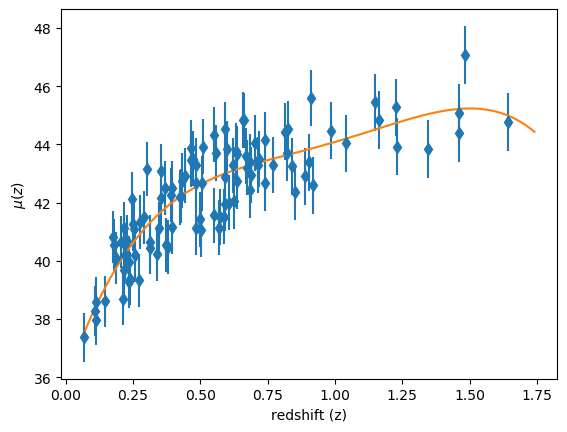

In [16]:
plt.errorbar(x_data, y_data, yerr=sigma, ls='', marker='d')
plt.plot(x_grid, y_predict)         
plt.xlabel('redshift (z)')
plt.ylabel(r'$\mu(z)$')

Text(0, 0.5, 'normalised residuals')

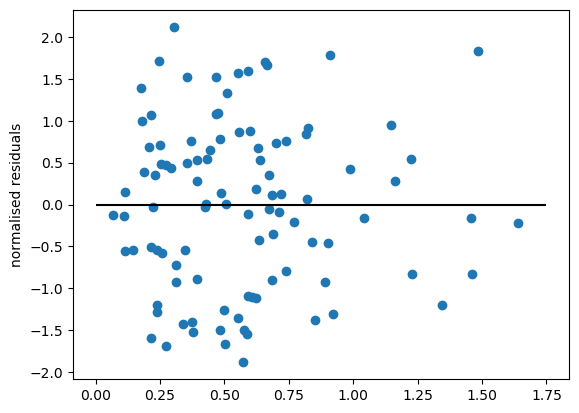

In [17]:
# Even better: if you trust your uncertainties, you may consider to use a normalised residual
# Normalised residuals: (data - model) / sigma
plt.scatter(x_data, (y_data-y_model) / sigma )
plt.hlines(0, 0, 1.75)
plt.ylabel("normalised residuals")

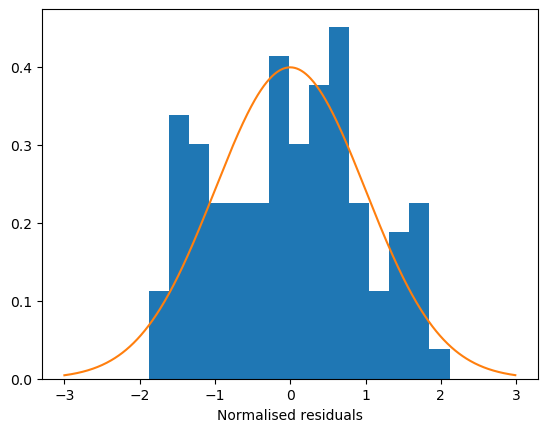

In [18]:
plt.hist((y_data-y_model) / sigma , bins=15, density=True);
plt.xlabel("Normalised residuals")
g = scipy.stats.norm(0, 1)
x_resi = np.arange(-3,3, 0.01)
plt.plot(x_resi, g.pdf(x_resi)); 

In [19]:
chi2 = np.sum(( (y_data-y_model)/sigma)**2) 
p_value = 1-scipy.stats.chi2.cdf(chi2, df= len(x_data)-(deg+1)) 
# Calculating R2 
R2 = 1 - (np.sum( (y_data-y_model)**2) / np.sum((y_data - y_data.mean())**2))
print('chi^2 = %.2f , for %i dof, namely a reduced chi2= %.2f' %(chi2, len(x_data)-(deg+1), chi2/(len(x_data)-(deg+1))) )
print('p_value %.3e' % p_value )
print('R^2 = %.3f'%R2)
print('Covariance matrix : \n', cov )

chi^2 = 96.94 , for 95 dof, namely a reduced chi2= 1.02
p_value 4.254e-01
R^2 = 0.757
Covariance matrix : 
 [[  14.86010115  -47.81826768   50.26584726  -19.56745264    2.20702071]
 [ -47.81826768  156.69632297 -168.36837761   67.13351609   -7.75966276]
 [  50.26584726 -168.36837761  185.94727167  -76.54110865    9.16274833]
 [ -19.56745264   67.13351609  -76.54110865   32.84564554   -4.14797313]
 [   2.20702071   -7.75966276    9.16274833   -4.14797313    0.57487588]]


Note here that $R^2$ is only marginally better than for when we fitted a straight line. On the contrary the $\chi^2$ shows that the polynomial model provides a good representation of the data. 

#### IV.1.3 Basis function regression

*This section is provided only for completeness. Topic not covered.*

The polynomial fit can be generalized to a fit of linear combination of basis functions, i.e. one can replace any row of the design matrix with any series of linear or non-linear functions of $x_i$. In other words, we replace:
$$
y_i = \theta_0 + \theta_1\,x_i + \theta_2\, x_i^2 + ... + \theta_K \, x_i^K + \epsilon_i
$$
by 
$$
y_i = \theta_0 + \theta_1\,B_1(x_i) + \theta_2\, B_2(x_i) + ... + \theta_K \, B_k(x_i) + \epsilon_i
$$

where $B_k(x_i)$ is an arbitrary basis function of our independent variable. 

As we are fitting only for coefficients multiplying these rows, the problem remains linear. Examples of such basis functions are "splines" and "Gaussian" basis function. 

Fitting basis functions can be done with the routine `BasisFunctionRegression` in `astroML.linear_model`. 

#### IV.1.4 Multi-Linear regression

*This section is provided only for completeness. Topic not covered*

The linear regression scheme introduced in [IV.1.1](IV.1.1) can be generalized to multivariate data. In that case insead of minimizing a line in 2 dimensions, we minimize an hyperplane in $k-$ dimensions: 

$$
y_i = \theta_0+\theta_1\,x_{i1} + \theta_2\,x_{i2} +  ...+ \theta_k \, x_{ik} + \epsilon_i
$$

The design matrix M is: 

$$
M =  \left[ \begin{array}{cccc}
1 & x_{00} & x_{01} & ... & x_{0k}\\ 
1 & x_{10} & x_{11} & ... & x_{1k} \\ 
... \\ 
1 & x_{N0} & x_{N1} & ... & x_{Nk}
 \end{array} \right], 
$$

If we fit a polynomial of order $p$ to data sets of $k$ dimensions, the number of parameters is given by:
$$
m = \frac{(p+k)!}{p!k!},
$$

and the number of degrees of freedom $\nu = N-m$. 

For our typical 1D case, we have $m = p+1$, where p is the order of the polynomial, but if you increase the number of dimensions, the number of parameters increases exponentially with the order p (as seen in the above expression of $m$).

**Python implementation** The multilinear regression is implemented in the function `LinearRegression` which is part of `sklearn.linear_model`. 

For making your regression, you do the following:

``` python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y, weights)  # x need to be of shape [N,k],  while y and weight are of shape [N]
# Weights are 1/sigma_i where sigma_i is the uncertainty on y_i

y_predict = model.predict(x)  # Predicted values

a_mod = model.coef_       # Get the slope(s)
b_mod = model.intercept_  # Get the intercept

```
 

In [20]:
# Implementation of the linear fit with sklearn 
from sklearn.linear_model import LinearRegression

data = np.loadtxt('SNdata.txt')
x_data, y_data, sigma = data[:,0], data[:,1], data[:,2]
x_data = x_data[:, np.newaxis]    # x should be [N,1] vector, because only 1 dependant variable !
wght = 1./sigma

model = LinearRegression()
model.fit(x_data, y_data, wght)
y_model = model.predict(x_data)

# Results of the fit
slope = model.coef_       # Get the slope
intercept = model.intercept_  # Get the intercept
print('Fitted coefficients: slope = %.3f, intercept= %.3f' %(slope, intercept))

chi2 = np.sum(( (y_data-y_model)/sigma)**2) 
print('chi^2 = %.2f , for %i dof, namely a reduced chi2= %.2f' %(chi2, len(x_data)-2, chi2/(len(x_data)-2)))

Fitted coefficients: slope = 4.536, intercept= 39.744
chi^2 = 153.67 , for 98 dof, namely a reduced chi2= 1.57


### IV.2 Regularization and penalization of the likelihood

It is sometimes desirable to reduce the complexity of the regression model, for example when the likelihood has a complex structure, or when the data are highly correlated such that the matrices become ill conditioned and inversion impossible, or simply when some regions of the parameter space need to be avoided. In such cases, one apply a penalty to the likelihood function. 

This is not discussed during the regular lecture. The interested reader may consult [Regression_short_sup.ipynb](Regression_short_sup.ipynb). 

### IV.3 Regression for non linear models:
    
When the model is **not** anymore linear *in its parameters*, then there is no direct solution through matrix inversion, and it becomes necessary to use purely numerical methods of optimisation. For frequentists, the strategy generally remains to optimize the maximum likelihood estimation, or equivalently minimizing the *weighted sum of the squared residuals* $\chi^2 \equiv\sum_{i=1}^{N} \left( \frac{y_i - f(x_i)}{\sigma_i} \right)^2$.   
Note that other merit function can be implemented (e.g. maximum entropy). 

A popular and efficient algorithm to find the parameters that minimize your $\chi^2$ merit function is the so-called Levenberg-Marquardt algorithm. Conceptually, that method switches between the "Gradient Descent Method" (you perturb the parameters by some amount "h" in the direction of steepest descent in your $\chi^2$ function), and the "Gauss-Newton Method" that assumes that locally your function is quadratic in the parameters to determine "h", through a "Lagrange parameter" lambda that is modified depending of the observed change in merit function. 

#### Python implementation

In python, you can use the `curve_fit()` function from the `scipy.optimize` to apply Levenberg Marquardt to the fit of your function. 

The `curve_fit()` function works like this:
``` python
# first create a function that defines your model
# It must take the independent variable as the first argument and the parameters to fit as separate remaining arguments.
def func(x, p1, p2, p3):
    y = f(x, p1, p2, p3)  # replace f(x, p1, p2, p3) by a function of vector x with parameters p1, p2, p3
    return y
# Second we call curve_fit(), first three arguments being func, xdata, ydata. Next two are optional initial guess and errors on y. 
pfit, pcov = scipy.optimize.curve_fit(func, xdata, ydata, p0=x0, sigma=sigma, absolute_sigma=True) 
# there is the possibility to constrain the parameters to certain ranges using method = 'trf'
```
<div class="alert alert-block alert-warning">
    
<b> Warning </b> The argument `absolute_sigma=True` is **mandatory** if you want a correct covariance matrix. By default, `curve_fit` considers relative sigma and rescale the sigma by a multicative factor based on the variance of the residuals (see help of `curve_fit` for details). Specifically, one there is the following relation: `pcov(absolute_sigma=False) = pcov(absolute_sigma=True) * chisq(popt)/ddof`.  `absolute_sigma=True` has the same effect as `cov='unscaled'` for `np.polyfit()`
</div>


**Important Note:** There is currently important development of model fitting within the astropy package. Several of the algorithm used are wrapper on algorithms from other packages (such as `numpy` and `scipy.optimize`), so think also 
of having a look to `astropy.modeling` (http://docs.astropy.org/en/stable/modeling/) when you search for implementations of classical fitting algorithm in python. 

#### Example: 

Again, let's use our supernova data and try to fit a logarithmic function $a + log(x^{b})$ to it. 

In [22]:
from scipy.optimize import curve_fit 

data = np.loadtxt('SNdata.txt')
x_data, y_data, sigma = data[:,0], data[:,1], data[:,2]
x_data = x_data 
wght = 1./sigma

def logmodel(x, p1, p2):
    return p1 + np.log10(x**p2)

p_model, cov = curve_fit(logmodel, x_data, y_data, sigma=sigma, absolute_sigma=True)

x_grid = np.linspace(x_data.min(), x_data.max()+0.1, 100)

y_predict = logmodel(x_grid, p_model[0], p_model[1])
y_model = logmodel(x_data,  p_model[0], p_model[1])

print('Fitted coefficients: ', p_model)

Fitted coefficients:  [44.26756375  5.97177443]


Text(0, 0.5, '$\\mu(z)$')

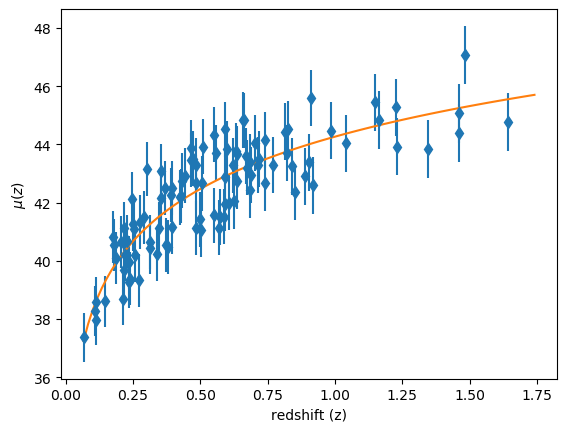

In [23]:
plt.errorbar(x_data, y_data, yerr=sigma, ls='', marker='d')
plt.plot(x_grid, y_predict)         
plt.xlabel('redshift (z)')
plt.ylabel(r'$\mu(z)$')

Text(0, 0.5, 'normalised residuals')

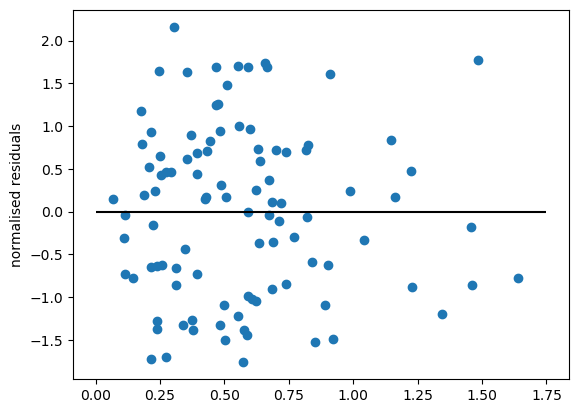

In [24]:
# Normalised residuals: (data - model) / sigma
plt.scatter(x_data, (y_data-y_model) / sigma )
plt.hlines(0, 0, 1.75)
plt.ylabel("normalised residuals")

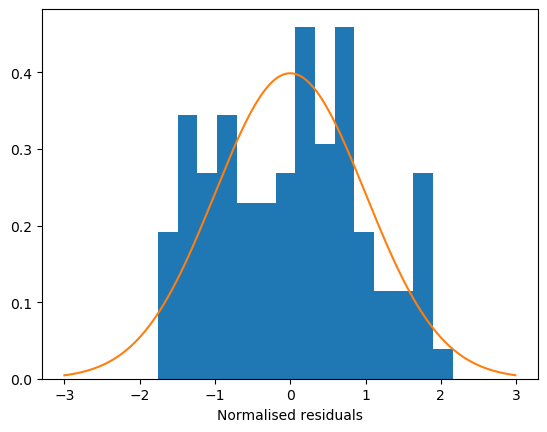

In [25]:
plt.hist((y_data-y_model) / sigma , bins=15, density=True);
plt.xlabel("Normalised residuals")
g = scipy.stats.norm(0, 1)
x_resi = np.arange(-3,3, 0.01)
plt.plot(x_resi, g.pdf(x_resi)); 

In [26]:
chi2 = np.sum(( (y_data-y_model)/sigma)**2) 
p_value = scipy.stats.chi2.sf(chi2, df= len(x_data)-2) 
print('chi^2 = %.2f , for %i dof, namely a reduced chi2= %.2f' %(chi2, len(x_data)-(2), chi2/(len(x_data)-(2))))
print('p_value %.3e' % p_value)
print('Covariance matrix : \n', cov)

chi^2 = 98.24 , for 98 dof, namely a reduced chi2= 1.00
p_value 4.742e-01
Covariance matrix : 
 [[0.02227959 0.03901021]
 [0.03901021 0.11339396]]


#### About initial conditions 

Non linear models are likely to converge towards a local minimum. For that reason it is *very important* to try to guess plausible values of the model parameters beforhand, in other words, you need to make a clever choice of the initial conditions. How can this be done?  
A likely possibility is that the parameters of your model can be interpreted "physically" (e.g. heating rate of material, period of rotation of an asteroid, period of revolution of a planet around its star, ...). This may help you to pick value that make sense. If this is not possible, or not enough (you know for a few parameters but not all), then you should proceed with method: 

- (a) Visualise the prediction of the model for various sets of parameters. Try to change them one by one to see how they impact the model, or, if possible grid the parameter space (This is not always tractable if you have many parameters). Compare visually the output of the models to your data. If your model go through your data points, you may hope to have reasonable enough initial conditions. 
- (b) if you have too many sets of parameters to test, it is then better to simply randomly sample the parameter space and calculate the $\chi^2$ for each set of random parameters, and subsequently start the fit from the set of parameters yielding the smaller $chi^2$. Visualising the values of the $\chi^2$ (or the distribution) for the different model parameters may allow you to guess better initial conditions. This approach starts to be close to what is performed in the framework of Bayesian inference. 
- (c) If the optimization is fast enough, you may consider performing the fit multiple times using either initial conditions from a grid of values, or randomly drawn initial conditions. 

#### Exercise IV.3 - Non Linear model: 

- Read the file "sinus_data.txt" and save its column into one (or multiple) arrays. The file contains 3 columns: theta, y, err_y. Where theta is an angle (in radians). 
- Fit a model of the form $sin(a * \theta + b)$. 
- Print the model parameters and their uncertainties. 
- Estimate the quality of the fit
- Overplot the fitted model on the data 

TIP: If you do not reach a satistfactory fit, use the argument `p0` to set initial conditions of the parameters for the fit 

In [19]:
data = np.loadtxt('sinus_data.txt')

In [25]:
# Define a model 
def sinus():
    return 

Covariance matrix : 
 [[ 4.48580995e-07 -1.18232354e-05]
 [-1.18232354e-05  3.99261952e-04]]
param 0 = 0.20 +/- 0.001
param 1 = 0.89 +/- 0.020


chi^2 = 124.72 , for 98 dof, namely a reduced chi2= 1.27


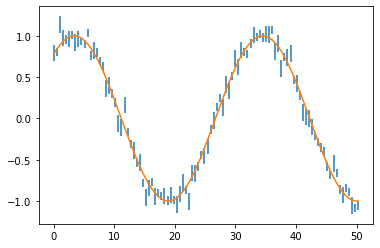

In [26]:
# Calculating the chi^2

It is likely that you had hard time getting the fit work because the fit tends to remain stucked into a local minimum. 

There are two main strategies to tackle that problem. 
- (1) One can estimate initial conditions based ont the structure seen in the signal. 
- (2) One can e.g. explore the chi2 "surface" by generating a large set of random initial conditions and run the fit for each of them. With the increase in the number of parameters it is best to generate randomly a range of possible parameters. 

In [ ]:
# A User informed initial conditions (by looking at the function)

In [ ]:
# A more brute force approach, more suitable when the search of initial conditions is difficutlt, 
# We generate randomly a range of possible parameters
ntry = 10000 
a_try = scipy.stats.uniform.rvs(0, 10, size=ntry)   # random vals between 0 and 2
b_try = scipy.stats.uniform.rvs(0, 10, size=ntry) # random vals between 0 and 2
chi2_try = np.zeros_like(a_try)
for i in range(ntry):
    y = sinus(data[:,0], a_try[i], b_try[i])
    chi2_try[i] = np.sum((y - data[:, 1])**2 / data[:,2])

f, ax = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
ax[0].scatter(a_try, chi2_try, marker='.')
ax[1].scatter(b_try, chi2_try, marker='.')
ax[0].set_ylabel('$\chi^2$')
ax[0].set_xlabel('p1 (a)')
ax[1].set_xlabel('p2 (b)')
chi2_try[chi2_try.argmin()], a_try[chi2_try.argmin()], b_try[chi2_try.argmin()]

Here, we start to see the $2 \pi$ periodicity of the phase (parameter p2 = b).   
The values of the parameters yielding the minimum chi2 above may be good starting value. 

In general, we may also use this "random exploration of the parameter space" to identify if there are correlations between pairs of parameters (This can play a role in finding the true minimum. This can be done with a scatter plot as below. 

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
myplot = ax.scatter(a_try, b_try, c=chi2_try, s=0.3, vmax=1000)
f.colorbar(myplot)
ax.set_xlabel('p1 (a)')
ax.set_ylabel('p2 (b)')

In [ ]:
# let's zoom in the region associated to the minimum chi2
f, ax = plt.subplots(figsize=(8,6))
myplot = ax.scatter(a_try, b_try, c=chi2_try, s=0.3, vmax=1000)
f.colorbar(myplot)
ax.set_xlabel('p1 (a)')
ax.set_ylabel('p2 (b)')
ax.set_xlim(0,0.4)

We see a small correlation between a and b and we again see well the $2\pi$ peridocity in the minimum in terms of value of the phase. 

Overall, we conclude that we should take as initial conditions, a value close to p1 = 0.2 and p2 = 0.95. These two values yield a small value of the $\chi^2$. The initial conditions are set with the argument "p0" of the function. 

In [ ]:
# Doing the optimization with initial conditions! 
p_model, cov = curve_fit(sinus, 
                         x_data, 
                         y_data, 
                         sigma=sigma, 
                         absolute_sigma=True, 
                         p0=[])
# Calculating the chi^2
y_model = sinus(x_data, p_model[0], p_model[1])
ddof = len(x_data) - 2. 
chi2 = np.sum(( (y_data-y_model)/sigma)**2) 


print('chi^2 = %.2f , for %i dof, namely a reduced chi2= %.2f' %(chi2, ddof, chi2/ddof) )
print('Fitted parameters: p1 = %.2f ; p2 = %.2f'%(p_model[0], p_model[1]))
pval = 1-scipy.stats.chi2.cdf(chi2, df=ddof)
print('p_value = %.2f'%pval)

# Plotting the results (data + model)
f, ax = plt.subplots(nrows=2, figsize=(8,5))
ax[0].errorbar(x_data, y_data, yerr = sigma, marker='.', ls = '')
ax[0].plot(x_data, y_model)
ax[1].plot(x_data, y_model - y_data, marker='.', ls='')
ax[1].hlines(0, 0, 50)

### IV.4 What if we have outliers, errors in $x$ and $y$, models with more parameters than data ?

There are "recipes" in the frequentist cookbook (see e.g. Numerical receipes) to address those problems, but Bayesian approaches provide sound and well motivated methodologies to deal with those situations ... 

To deal with outliers, a simple approach is to perform "sigma_clipping". The basic idea is to develop an iterative procedure that consists in comparing the variance in the residuals to the variance expected from the uncertainties, and remove points that deviate by more than $n \times \sigma$ from the residuals.  

For dealing with errors in $x$ and $y$, more robust handling of outliers, models with more parameters than data, you'll find better solutions within Bayesian statistical inference. 

#### Exercise IV.4: Data with outliers 

Cepheid stars are variable stars whose brightness fluctuates periodically. They enabled Henrietta Leavitt to discover a fundamental relationship in astronomy in 1912. This relation is called Period-luminosity relation. It relates the variability period of a cepheid to its distance: $M = a * \log{(P)} + b $ where P is the Period, M the absolute magnitude and a and b are two coefficients of the relation. 

The dataset below corresponds to measurement of the period, absolute magnitude and uncertainty on the absolute magnitude for a sample of 10 stars. 
- Visualise the data set 
- Write a function that implements the above Period-magnitude relation (that we'll call Leavitt model) 
- Derive the best fit parameters using a regression technique
- Comment your results 
- Implement a simple "sigma-clipping" technique to get rid of outlier(s). 
- Perform a new fit with outliers removed. 

BONUS: Is this a linear or a non linear regression? 

In [ ]:
period = np.array([2, 5, 10, 15, 20, 30, 40, 50, 70, 100])
mag_abs = np.array([-2.5, -3.2, -4.0, -4.5, -4.8, -4.3, -5.6, -5.9, -6.3, -6.7])
sigma_m = np.array([0.2, 0.15, 0.15, 0.1, 0.1, 0.12, 0.15, 0.18, 0.2, 0.22])

# Visualising the data 
plt.figure(figsize=(10, 6))
plt.errorbar(,                                       # <- fill w. x, y, y_err
             fmt='o', color='navy', markersize=8, 
             capsize=5, label='Observed data')
plt.xlabel('Period (days)', fontsize=12)
plt.ylabel('Mean absolute magnitude', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.gca().invert_yaxis()  # Intrinsically brigher stars on top 

In [ ]:
# Write a function that implements Leavitt's model 

In [ ]:
# Make the fit  (ideally write a function that does the fit, print key results, returns model params and uncertainties)

In [ ]:
# Display the results 

### IV.5 Summary of python tools for regression

This summary is not exhaustive and only includes those regression techniques we have discussed above. 


| Model | Package | Comments  | 
|-------|---------|--------|
|Linear  | `np.polyfit()` (see also `np.polynomial` for higher precision) | $y=f(x)$ but can fit same model on multiple (k) data sets; weights = $1/\sigma$ |
|Linear  | `sklearn.linear_model.LinearRegression()` | $y = f(x_1, ..., x_n)$; weights = $1/\sigma$ |
|Linear + regularization | `sklearn.linear_model.Ridge()` | $\sum \theta_p^2 < s$; `RidgeCV()` implements cross validation for getting best $\lambda$|
|Linear + regularization | `sklearn.linear_model.Lasso()` | $\sum |\theta_p| < s$; `LassoCV()` implements cross validation for getting best $\lambda$|
|Non Linear | `scipy.optimize.curve_fit()` | Uses Levenberg marquardt for optimization; sigma = $\sigma$, do not forget arg. `absolute_sigma = True` (Otherwise, *implicit* rescaling of your errors)|
|Non Linear | `astropy.modeling()` | Under active development ; Well suited to fit variety of 2D models (e.g. $z=f(x,y)$ - PSF/galaxy model on an image), but several 1D models are also available. | 
|Non Linear | [`lmfit`](http://cars9.uchicago.edu/software/python/lmfit/index.html) | High level interface to Levenberg Marquardt optimization; allows bounds on parameters| 

The module `statsmodels` (see https://www.statsmodels.org/stable/index.html ) provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and performing regressions. Once regression is perfomed on data, it also systematically calculates various quantities or performs various tests allowing one to quantify the quality of your model(ing). Researchers familiar with `R` will recognise features available when performing statistical analyses with that language. `Pandas dataframes` are the prefered data format but `numpy arrays` can also be used. See also the following webpage http://scipy-lectures.org/packages/statistics/index.html#formulas-to-specify-statistical-models-in-python to understand how data, models, and variables (the `y` variable in `statsmodels` is called *endogenous* while the `x` variable is called *exogenous*) are defined with `statsmodels`. 

Here is an example of `statsmodels` output for an ordinary least-square regression: 

<img src="../Figures/Statsmodels_example.png" alt="Statsmodels_example.png" style="width: 800px;"/>

## Summary 

- The likelihood of data, given model parameters, is defined as $L \equiv P(D \,|\, M(\theta))$. 
- The point-estimators used in classical (frequentists) are in general estimators that maximize the likelihood, and are therefore called "Maximum Likelihood Estimators". 
- For random variables that follow a normal distribution $N(\mu, \sigma)$, the likelihood is given as: 

$$
L \equiv p(\{x_i\} | \mu, \sigma ) = \frac{1}{\sigma^n (2\,\pi)^{n/2}} \exp \left ( \sum_{i=1}^N \frac{-(x_i - \mu)^2}{2\, \sigma^2} \right) 
$$
- Regression of a model $y(x)$ through data points $D={(x_i, y_i)}$ is generally performed by minimizing a merit function of the form: 

$$
\chi^2 \equiv \sum \frac{(y_i - y^{\rm{mod}}_i)^2}{\sigma^2_i} 
$$

- In addition we have the following: 
  - Minimizing the above merit function is called a $\chi^2$ regression. The $\chi^2$ merit function follows a $\chi^2$ distribution with $\nu$ degrees of freedom, where the number of degrees of freedom is given by the difference between the number of data points and the number of parameters of the model. 
  - When the uncertainties $\sigma_i = 1$ for all the data points, one speaks of a "least-square" regression. 
  - One defines the reduced $\chi^2_{\rm red} = \chi^2 / \nu$. In the case where the model represents well the data , a $\chi^2_{\rm red} \sim 1$ is expected (as $\nu$ is the expectation value of the chi-2 distribution). 
  - The quality of the regression can be evaluated based on the comparison of the obtained $\chi^2$ and its expectation value (from the chi-2 distribution). This can be summarized by calculating a p-value which is $p \equiv 1-\rm{CDF}(\rm{chi2}(\nu))$, where $\nu$ is the number of degrees of freedom of the chi-2 distribution.  
  - The model parameters inferred through a regression, are parameters that maximize the likelihood. 
 
- The likelihood for gaussian uncertainties is proportional to $\exp(-\chi^2/2)$ 
- A regression model is said *linear* if it is linear in its model parameters. In this case, there is an exact solution resulting from matrix inversion and multiplications, involving the data and their uncertainties (through a covariance matrix). 
- A regression model is *not linear* if it is **not** linear in its parameters. In that case, a numerical algorithm is needed to find the best model parameters. 
- A non exhaustive list of python tools usable for regression is provided in Sect. [IV.5](#IV.5-Summary-of-python-tools-for-regression)

## XX. References and supplementary material: <a class="anchor" id="X"></a>

**Chapter 4** (4.5, 4.7), **Chapter 8** (8.1, 8.2, 8.7) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

* *All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a> (see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/): **Chapter 8, 9**

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 6, 7, 8, 9**

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 15**

Other useful references: 

- Linear regression with large number of parameters and (advanced) applications of linear fitting: Hogg and Villar 2021: https://arxiv.org/abs/2101.07256  

- Coefficient of determination and $R^2$: https://online.stat.psu.edu/stat462/node/95/ 

- Sklearn help: http://scikit-learn.org/stable/modules/linear_model.html

- Guide on General Least Square regression by Paul Johnson: http://pj.freefaculty.org/guides/stat/Regression/GLS/GLS-1-guide.pdf
